In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Diabetes Binary Classification Dataset</h2>

Input Features:
'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age' <br>

Target Feature: 
'diabetes_class'<br>

Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [95]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
           'diabetes_pedi', 'age']

In [96]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [97]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


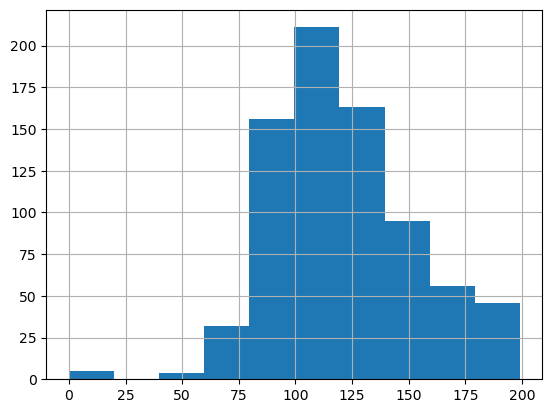

In [98]:
df['glucose_concentration'].hist()
plt.show()

In [99]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [100]:
f = [c for c in df.columns if c not in ['diabetes_class']]
df[f]=df[f].mask(df[f]==0).fillna(df[f].mean())

In [101]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [102]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

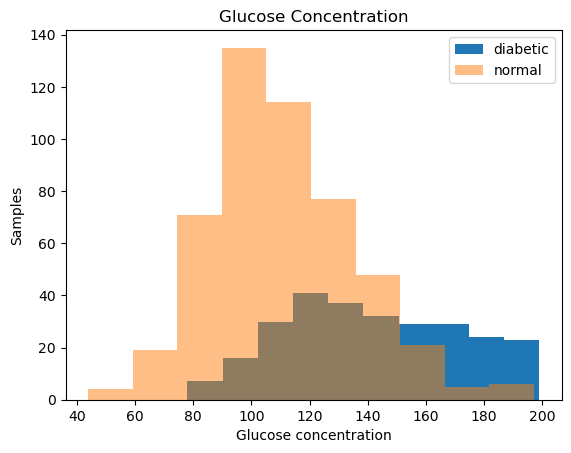

In [103]:
# Glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

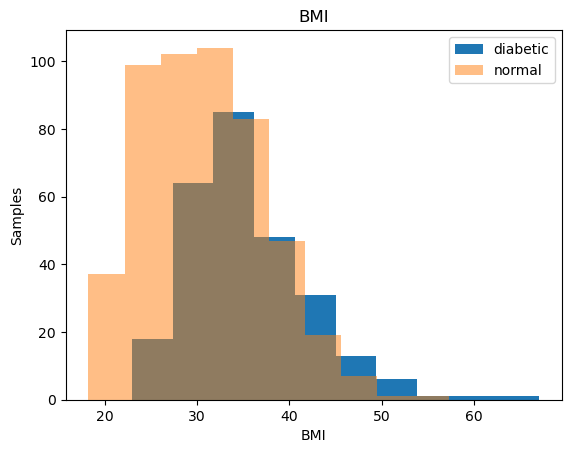

In [104]:
# BMI histogram
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

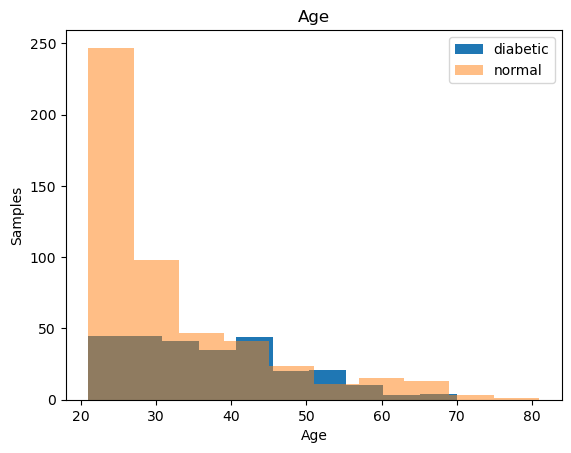

In [105]:
# Age
plt.hist(df[diabetic].age,label='diabetic')
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [106]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [107]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [108]:
rows, train, test

(768, 537, 231)

In [109]:
# Write Training Set
df[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [110]:
# Write Validation Set
df[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [111]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))